In [2]:
#import important libraries
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import matplotlib.pyplot as plt
# Keras API
from tensorflow import keras
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,BatchNormalization,Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense, Dropout, Activation, Flatten
#from tensorflow.keras.layers import Conv2D, MaxPooling2D,Concatenate
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.math import confusion_matrix 
import pickle
import time
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
#load the dataset from pickled files
pickle_in = open("X_unaugmented_BW.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("Y_unaugmented_BW.pickle","rb")
y = pickle.load(pickle_in)
y = to_categorical(y)

In [4]:
#split into train and test datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=123)
print(X_test.shape)
print(y_test.shape)

(1621, 64, 64, 1)
(1621, 5)


In [5]:
from tensorflow.keras.utils import plot_model
#from keras.layers.merge import concatenate
from tensorflow.keras.models import Model
#from tensorflow.keras.callbacks import ModelCheckpoint

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 128)       3328      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 20, 20, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 32)        36896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          1

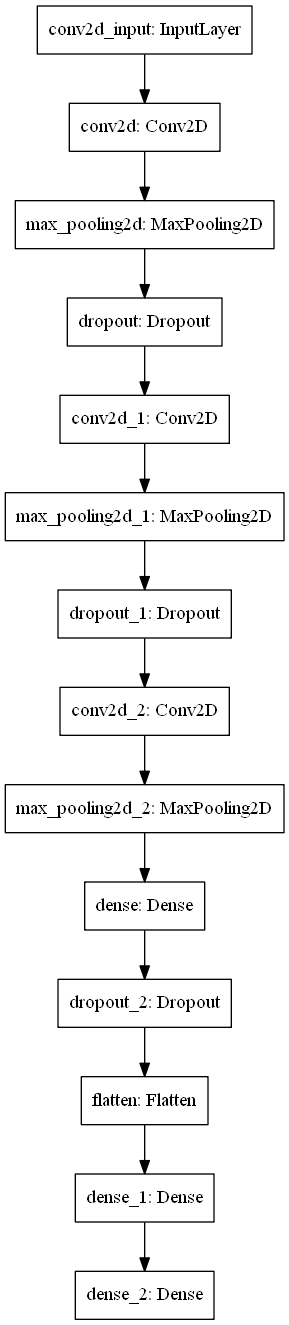

In [6]:
from tensorflow.keras.utils import plot_model
visible1 = (64,64,1)
model = Sequential()
model.add(Conv2D(128, (5, 5),input_shape=visible1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.3))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))   
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))          
model.add(Dense(5,activation='softmax'))
model.summary()
plot_model(model, to_file='convolutional_neural_network.png')

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy', keras.metrics.Precision(),  keras.metrics.Recall()],
             )

In [8]:
import time
start = time.perf_counter()
print(y_train.shape)

history=model.fit(X_train, y_train,
          batch_size=64,
          epochs=20,
          validation_split=0.1,
          callbacks=None,class_weight=None)

elapsed = time.perf_counter() - start
print('Elapsed %.3f seconds.' % elapsed)

(6482, 5)
Epoch 1/20
92/92 [==============================] - 36s 387ms/step - loss: 2.5271 - accuracy: 0.5459 - precision: 0.6475 - recall: 0.3718 - val_loss: 0.7206 - val_accuracy: 0.7411 - val_precision: 0.8446 - val_recall: 0.6364
Epoch 2/20
92/92 [==============================] - 34s 373ms/step - loss: 0.5897 - accuracy: 0.7610 - precision: 0.8159 - recall: 0.7074 - val_loss: 0.4535 - val_accuracy: 0.8552 - val_precision: 0.8889 - val_recall: 0.8012
Epoch 3/20
92/92 [==============================] - 34s 370ms/step - loss: 0.4205 - accuracy: 0.8383 - precision: 0.8654 - recall: 0.8143 - val_loss: 0.3935 - val_accuracy: 0.8706 - val_precision: 0.8919 - val_recall: 0.8521
Epoch 4/20
92/92 [==============================] - 34s 372ms/step - loss: 0.3733 - accuracy: 0.8634 - precision: 0.8836 - recall: 0.8421 - val_loss: 0.4506 - val_accuracy: 0.8305 - val_precision: 0.8574 - val_recall: 0.7874
Epoch 5/20
92/92 [==============================] - 34s 369ms/step - loss: 0.3608 - accura

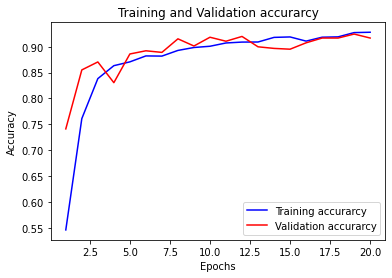

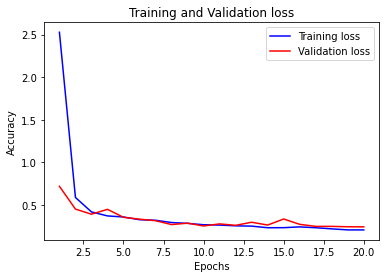

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
score,accuracy,precision,recall = model.evaluate(X_test,y_test,verbose=1)
f1 = (2*(precision*recall))/(precision+recall)
print("Test loss is {}".format(score))
print("Test accuracy is {}".format(accuracy))
print("Test Precision is {}".format(precision))
print("Test Recall is {}".format(recall))
print("Test f1_score is {}".format(f1))

51/51 [==============================] - 2s 44ms/step - loss: 0.2473 - accuracy: 0.9155 - precision: 0.9233 - recall: 0.9056
Test loss is 0.24734140932559967
Test accuracy is 0.9154842495918274
Test Precision is 0.9232704639434814
Test Recall is 0.9056138396263123
Test f1_score is 0.9143569204824932


In [ ]:
b=np.zeros(len(y)).astype(int)
#print(b)
#print(len(y_test))
for i in range(0,len(y)):
  b[i]=np.where(y[i]==1)[0][0]
print(b)

In [ ]:
y_pred=np.argmax(model.predict(X), axis=-1)

In [ ]:
print(len(y_pred))

In [ ]:
import pandas as pd
df = pd.read_csv('E:/Meat_Excels/NameandLabels.csv')

In [ ]:
df['Predicted_Labels'] = y_pred
df.to_csv('E:/Meat_Excels/NameandLabels_Predicted_on_unaug_BW.csv')

In [ ]:
import tensorflow.math as tfm
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
#model = load_model("/content/gdrive/My Drive/cdrive/Python_projects/vision_paper/models/3-conv-128-layer-dense-1-out-2-softmax-categorical-cross-2-CNN_test_using_functional_api.model")
#model = load_model("/content/gdrive/My Drive/cdrive/Python_projects/vision_paper/models/3-conv-128-layer-dense-1-out-2-softmax-categorical-cross-2-CNN_test_using_functional_api_no_rotation.model")


#print(model.summary)
#y_pred=model.predict_classes(X_test)
print(model.predict(X_test))
print(model.predict((X_test))[1][1])
y_pred=np.argmax(model.predict((X_test)), axis=-1)


#
classes=[0,1,2,3,4]
#classes=[0,1,2,3,4]
a=np.zeros(len(y_test)).astype(int)
#b=np.zeros(len(y_train)).astype(int)
#print(a)
#print(len(y_test))
for i in range(0,len(y_test)):
    a[i]=np.where(y_test[i]==1)[0][0]
print(a)
#for j in range(0,len(y_train)):
#    b[i]=np.where(y_train[j]==1)[0][0]

#print(b)
con_mat = tfm.confusion_matrix(labels=a, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,index = classes, columns = classes)

#con_mat_1 = tfm.confusion_matrix(labels=b, predictions=y_pred).numpy()
#con_mat_norm_1 = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
#con_mat_df_1 = pd.DataFrame(con_mat_norm,index = classes, columns = classes)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
score = model.evaluate((X_test), y_test, verbose=0)
#score = model.evaluate((X_test), y_test, verbose=0)
print(score)

In [ ]:
#a=np.zeros(len(y)).astype(int)
#for i in range(0,len(y)):
  #a[i]=np.where(y[i]==1)[0][0]
#print(a)

In [ ]:
#import pandas as pd
#pd.Series(a)